# 第5章: 係り受け解析
日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [1]:
import CaboCha

article = 'ai/ai.ja.txt'
output = 'ai.ja.txt.parsed'

cabocha = CaboCha.Parser()

with open(article, 'r') as f:
    l_strip = [s.strip() for s in f.readlines() if s != '\n']

with open(output, mode='w') as f:
    for each in l_strip:
        f.write(cabocha.parse(each).toString(CaboCha.FORMAT_LATTICE))

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [2]:
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

In [3]:
import csv

with open(output, 'r') as f:
    reader = csv.reader(f)
    l_morpheme = [row for row in reader]

morph_article, morph_sentence = [], []

for each_morpheme in l_morpheme:
    
    if len(each_morpheme) > 1:
        
        morph = Morph(surface=each_morpheme[0].split('\t')[0],
                      base=each_morpheme[6], pos=each_morpheme[0].split('\t')[1],
                      pos1=each_morpheme[1])
        
        morph_sentence.append(morph)
        
    elif each_morpheme[0] == 'EOS':
        morph_article.append(morph_sentence)
        morph_sentence = []

for each_morph in morph_article[1]:
    print('表層形\t: {}'.format(each_morph.surface))
    print('基本形\t: {}'.format(each_morph.base))
    print('品詞\t: {}'.format(each_morph.pos))
    print('細分類1\t: {}'.format(each_morph.pos1))
    print()

表層形	: 人工
基本形	: 人工
品詞	: 名詞
細分類1	: 一般

表層形	: 知能
基本形	: 知能
品詞	: 名詞
細分類1	: 一般

表層形	: （
基本形	: （
品詞	: 記号
細分類1	: 括弧開

表層形	: じん
基本形	: じん
品詞	: 名詞
細分類1	: 一般

表層形	: こうち
基本形	: こうち
品詞	: 名詞
細分類1	: 一般

表層形	: のう
基本形	: のう
品詞	: 助詞
細分類1	: 終助詞

表層形	: 、
基本形	: 、
品詞	: 記号
細分類1	: 読点

表層形	: 、
基本形	: 、
品詞	: 記号
細分類1	: 読点

表層形	: AI
基本形	: *
品詞	: 名詞
細分類1	: 一般

表層形	: 〈
基本形	: 〈
品詞	: 記号
細分類1	: 括弧開

表層形	: エーアイ
基本形	: *
品詞	: 名詞
細分類1	: 固有名詞

表層形	: 〉
基本形	: 〉
品詞	: 記号
細分類1	: 括弧閉

表層形	: ）
基本形	: ）
品詞	: 記号
細分類1	: 括弧閉

表層形	: と
基本形	: と
品詞	: 助詞
細分類1	: 格助詞

表層形	: は
基本形	: は
品詞	: 助詞
細分類1	: 係助詞

表層形	: 、
基本形	: 、
品詞	: 記号
細分類1	: 読点

表層形	: 「
基本形	: 「
品詞	: 記号
細分類1	: 括弧開

表層形	: 『
基本形	: 『
品詞	: 記号
細分類1	: 括弧開

表層形	: 計算
基本形	: 計算
品詞	: 名詞
細分類1	: サ変接続

表層形	: （
基本形	: （
品詞	: 記号
細分類1	: 括弧開

表層形	: ）
基本形	: ）
品詞	: 記号
細分類1	: 括弧閉

表層形	: 』
基本形	: 』
品詞	: 記号
細分類1	: 括弧閉

表層形	: という
基本形	: という
品詞	: 助詞
細分類1	: 格助詞

表層形	: 概念
基本形	: 概念
品詞	: 名詞
細分類1	: 一般

表層形	: と
基本形	: と
品詞	: 助詞
細分類1	: 並立助詞

表層形	: 『
基本形	: 『
品詞	: 記号
細分類1	: 括弧開

表層形	: コンピュータ
基本形	: コンピュータ
品詞	: 名詞
細分類1	: 一般

表

## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
class Chunk:
    def __init__(self):
        self.morphs = []
        self.dst = -1
        self.srcs = []

In [5]:
def addMorphs(chunks, morphs):
    if len(morphs) > 0:
        chunks[-1].morphs = morphs
        morphs = []
        
    return chunks, morphs

article_chunks, chunks, morphs = [], [], []
dst_srcs_dict = {}

for each_morpheme in l_morpheme:
    splitted_zero = each_morpheme[0].split()
    
    if splitted_zero[0] == '*':
        chunk = Chunk()
        dst = int(splitted_zero[2][:-1])
        src = int(splitted_zero[1])
        
        if dst in dst_srcs_dict.keys():
            dst_srcs_dict[dst].append(src)
        else:
            dst_srcs_dict[dst] = [src]
        
        chunk.dst = dst
        chunks, morphs = addMorphs(chunks, morphs)
        chunks.append(chunk)
    
    elif splitted_zero[0] == 'EOS':
        # 直前の chunk に morphs を足す
        chunks, morphs = addMorphs(chunks, morphs)
        assert morphs == []
        
        for dst in [i for i in dst_srcs_dict.keys() if i > -1]:
            chunks[dst].srcs = dst_srcs_dict[dst]
        
        article_chunks.append(chunks)
        chunks = []
        dst_srcs_dict = {}
        
    else:
        morphs.append(Morph(surface=each_morpheme[0].split('\t')[0],
                      base=each_morpheme[6], pos=each_morpheme[0].split('\t')[1],
                      pos1=each_morpheme[1])
                      )

## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [6]:
import re
stopwords = r'。|．|、|，|「|」|『|』|（|）|\(|\)|・|\/|／|〈|〉'
pattern = re.compile(stopwords)

def removeStopwords(surfaces):
    print(','.join([pattern.sub('', surface) for surface in surfaces]))

for chunks in article_chunks:
    for dst, chunk in enumerate(chunks):
        if chunk.srcs != []:
            
            print('【係り元】', end='')
            src_surfaces = []
            for src in chunk.srcs:
                src_chunks = []
                for surface in [morph.surface for morph in chunks[src].morphs]:
                    src_chunks.append(surface)
                src_surfaces.append(''.join(src_chunks))
            removeStopwords(src_surfaces)
            
            print('【係り先】', end='')
            removeStopwords([''.join(morph.surface for morph in chunks[dst].morphs)])
                
            print()

【係り元】AI
【係り先】エーアイとは

【係り元】計算
【係り先】という

【係り元】コンピュータ
【係り先】という

【係り元】という,概念と,という
【係り先】道具を

【係り元】道具を
【係り先】用いて

【係り元】用いて,知能を
【係り先】研究する

【係り元】研究する
【係り先】計算機科学

【係り元】計算機科学
【係り先】の

【係り元】の
【係り先】一分野を

【係り元】一分野を
【係り先】指す

【係り元】人工知能,じんこうちのう,エーアイとは,指す
【係り先】語

【係り元】言語の,理解や
【係り先】推論

【係り元】推論
【係り先】問題解決などの

【係り元】問題解決などの
【係り先】知的行動を

【係り元】知的行動を,人間に
【係り先】代わって

【係り元】代わって,コンピューターに
【係り先】行わせる

【係り元】行わせる
【係り先】技術または

【係り元】計算機
【係り先】コンピュータによる

【係り元】コンピュータによる,知的な
【係り先】情報処理システムの

【係り元】情報処理システムの,設計や
【係り先】実現に関する

【係り元】語,技術または,実現に関する
【係り先】研究分野とも

【係り元】研究分野とも
【係り先】される

【係り元】日本大百科全書ニッポニカの
【係り先】解説で

【係り元】情報工学者通信工学者の
【係り先】佐藤理史は

【係り元】解説で,佐藤理史は,次のように
【係り先】述べている

【係り元】人間の
【係り先】知的能力を

【係り元】知的能力を,コンピュータ上で
【係り先】実現する

【係り元】実現する,様々な
【係り先】技術ソフトウェアコンピュータシステム

【係り元】自然言語処理
【係り先】機械翻訳かな漢字変換構文解析等

【係り元】機械翻訳かな漢字変換構文解析等
【係り先】専門家の

【係り元】専門家の
【係り先】推論判断を

【係り元】推論判断を
【係り先】模倣する

【係り元】模倣する
【係り先】エキスパートシステム

【係り元】画像データを
【係り先】解析して

【係り元】特定の
【係り先】パターンを

【係り元】解析して,パターンを
【係り先】検出抽出したりする

【係り元】エキスパートシステム,検出抽出したりする
【係り先】画像認識等が

【係り元】技術ソフトウェアコンピュータシステム,応用例

## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [7]:
import re
stopwords = r'。|．|、|，|「|」|『|』|（|）|\(|\)|・|\/|／|〈|〉'
pattern = re.compile(stopwords)

def removeStopwords(surfaces):
    if type(surfaces) == list:
        print(','.join([pattern.sub('', surface) for surface in surfaces]))
    elif str:
        print(''.join([pattern.sub('', surface) for surface in surfaces]))

for chunks in article_chunks:
    for dst, chunk in enumerate(chunks):
        if chunk.srcs != []:
            src_surfaces = []
            src_surfaces_postags = []
            
            for src in chunk.srcs:
                src_chunks = []
                src_postags = []
                for morph in chunks[src].morphs:
                    src_chunks.append(morph.surface)
                    src_postags.append(morph.pos)
                src_surfaces.append(''.join(src_chunks))
                src_surfaces_postags.append(src_postags)
            
            for morph in chunks[dst].morphs:
                if morph.pos == '動詞':
                    
                    for i, each_postag in enumerate(src_surfaces_postags):
                        if '名詞' in each_postag:
                            print('【係り元】', end='')
                            removeStopwords(src_surfaces[i])
                            print('【係り先】', end='')
                            removeStopwords(morph.surface)
                            print()

【係り元】道具を
【係り先】用い

【係り元】知能を
【係り先】する

【係り元】一分野を
【係り先】指す

【係り元】知的行動を
【係り先】代わっ

【係り元】人間に
【係り先】代わっ

【係り元】コンピューターに
【係り先】行わ

【係り元】コンピューターに
【係り先】せる

【係り元】研究分野とも
【係り先】さ

【係り元】研究分野とも
【係り先】れる

【係り元】解説で
【係り先】述べ

【係り元】佐藤理史は
【係り先】述べ

【係り元】次のように
【係り先】述べ

【係り元】解説で
【係り先】いる

【係り元】佐藤理史は
【係り先】いる

【係り元】次のように
【係り先】いる

【係り元】知的能力を
【係り先】する

【係り元】コンピュータ上で
【係り先】する

【係り元】推論判断を
【係り先】する

【係り元】画像データを
【係り先】し

【係り元】解析して
【係り先】し

【係り元】パターンを
【係り先】し

【係り元】解析して
【係り先】する

【係り元】パターンを
【係り先】する

【係り元】技術ソフトウェアコンピュータシステム
【係り先】ある

【係り元】応用例は
【係り先】ある

【係り元】画像認識等が
【係り先】ある

【係り元】1956年に
【係り先】さ

【係り元】ダートマス会議で
【係り先】さ

【係り元】ジョンマッカーシーにより
【係り先】さ

【係り元】1956年に
【係り先】れ

【係り元】ダートマス会議で
【係り先】れ

【係り元】ジョンマッカーシーにより
【係り先】れ

【係り元】記号処理を
【係り先】用い

【係り元】記述を
【係り先】する

【係り元】主体と
【係り先】する

【係り元】命名された
【係り先】使わ

【係り元】現在では
【係り先】使わ

【係り元】意味あいでも
【係り先】使わ

【係り元】命名された
【係り先】れ

【係り元】現在では
【係り先】れ

【係り元】意味あいでも
【係り先】れ

【係り元】命名された
【係り先】いる

【係り元】現在では
【係り先】いる

【係り元】意味あいでも
【係り先】いる

【係り元】思考ルーチンも
【係り先】呼ば

【係り元】思考ルーチンも
【係り先】れる

【係り元】ことも
【係り先】ある

【係り元】カウンセラーを
【係り先】し

【係り元】プログラム
【係り先】出さ

## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

[参考にした](https://swdrsker.hatenablog.com/entry/2017/05/19/205409)

In [ ]:
!apt update && apt install graphviz

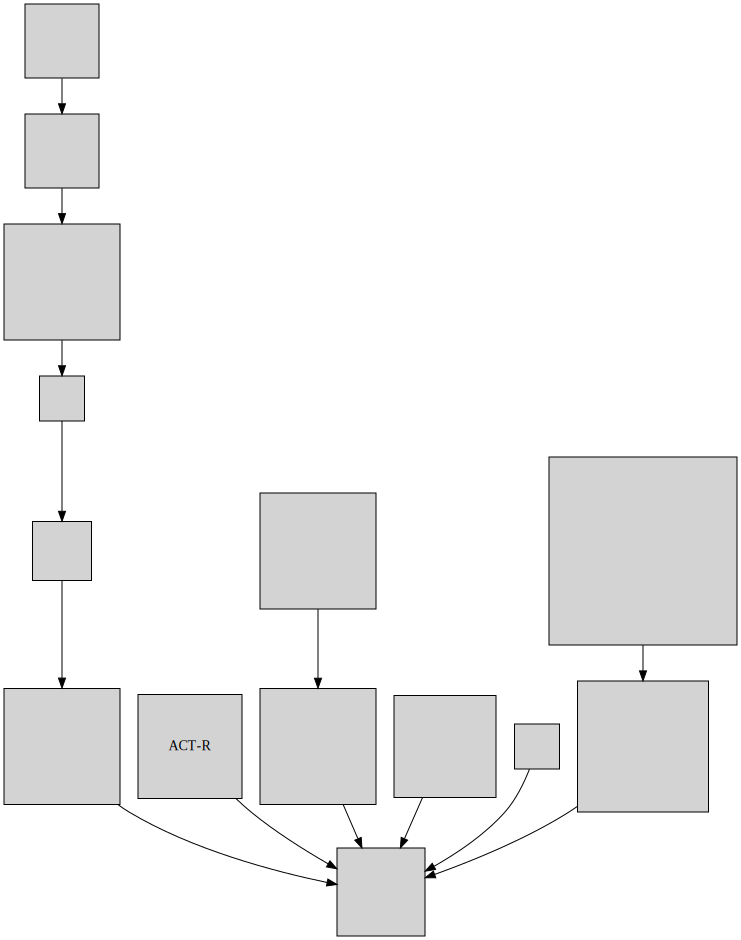

In [58]:
from graphviz import Digraph

def drawGraph(edgeList):
    G = Digraph(format='png')
    G.attr('node', shape='square', style='filled')
    for fr, to in edgeList:
        G.edge(fr, to)

    return G

def makeEdgeList(sentence):
    edgeList = []

    for i, chunk in enumerate(sentence):
        if chunk.dst != -1:
            fr = ''.join([morph.surface for morph in chunk.morphs])
            to = ''.join([morph.surface for morph in sentence[chunk.dst].morphs])
            edgeList.append([fr, to])

    return edgeList

target_sentence = article_chunks[8]
G = drawGraph(makeEdgeList(target_sentence))
G.render('44-graphs')
G